In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_path = r"UpdatedResumeDataSet.csv"
data = pd.read_csv(data_path)
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
data.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x272e4fa1780>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

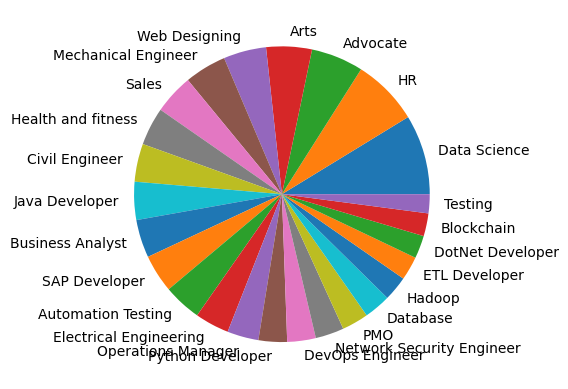

In [8]:
plt.pie(data['Category'].value_counts() , labels = data['Category'].unique())

In [9]:
# preprocess my daataset:
x = data.drop('Category' , axis=1)
x = np.array(x)
x[0]

array(['Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Inves

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deepraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
import re

In [12]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [13]:
#preprocessing my daatset:

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lematizer = WordNetLemmatizer()
corpus = []
for sentence in x:
    cleaned_sent = cleanResume(sentence[0].lower())
    filtered = [lematizer.lemmatize(word) for word in word_tokenize(cleaned_sent) if word.isalpha() and word not in stop]
    filtered_sent = ' '.join(filtered)
    corpus.append(filtered_sent)


In [14]:
corpus

['skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch j dc j plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learning education detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist elerating review process run analytics generate report core memb

In [15]:
y = data['Category']
title = {}
i = 0
for post in y.unique():
    if post in title.keys():
        continue
    else:
        title[post] = i
        i+=1

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
y = np.array(y)

In [18]:
le.inverse_transform([7])

array(['Database'], dtype=object)

In [19]:
y

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 22

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(corpus,y,test_size=0.3,random_state=42)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
bow = CountVectorizer(ngram_range=(2,2))
x_train_bow = bow.fit_transform(x_train)
x_test_bow = bow.transform(x_test)

In [24]:
tfidf = TfidfVectorizer(ngram_range=(2,2))
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [25]:
print(x_train_bow.shape)
print(y_train.shape)

(673, 32042)
(673,)


Model : LogisticRegression 
Train data accuracy: 1.0
Test data accuracy 0.986159169550173




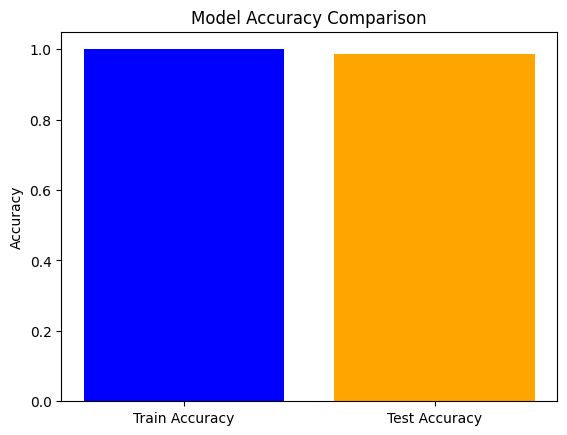

Model : Support Vector Classifier 
Train data accuracy: 0.9702823179791976
Test data accuracy 0.9342560553633218




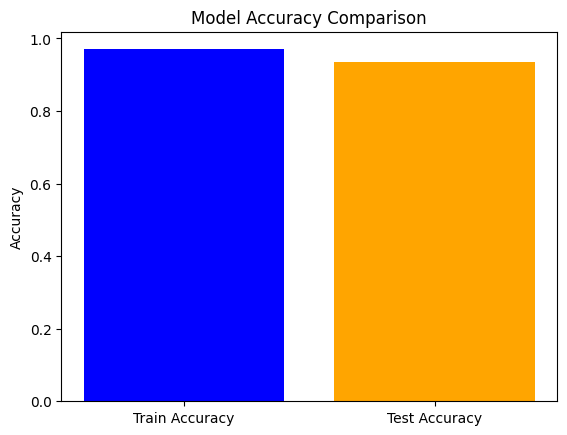

Model : KNN 
Train data accuracy: 0.9108469539375929
Test data accuracy 0.8269896193771626




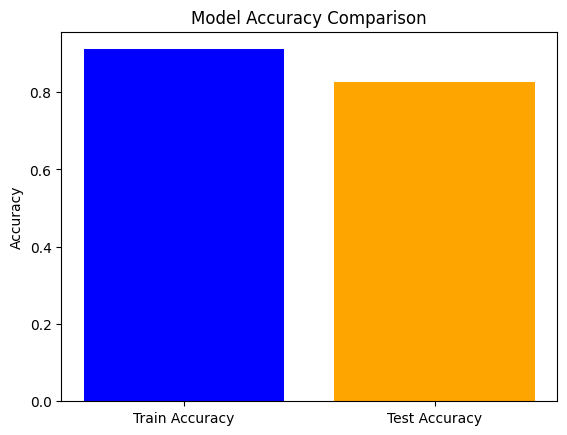

Model : RandomForestClassifier 
Train data accuracy: 1.0
Test data accuracy 0.9930795847750865




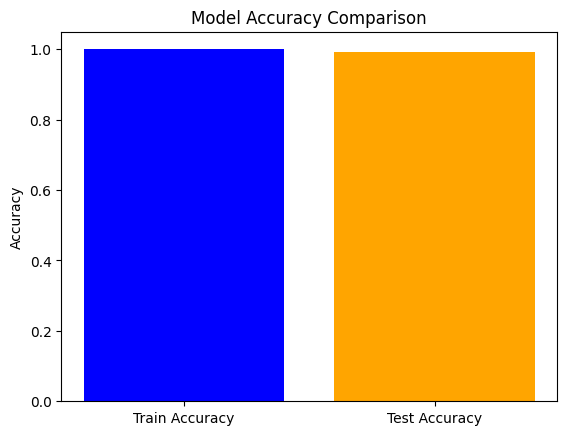

Model : Gradient Boost 
Train data accuracy: 1.0
Test data accuracy 0.9930795847750865




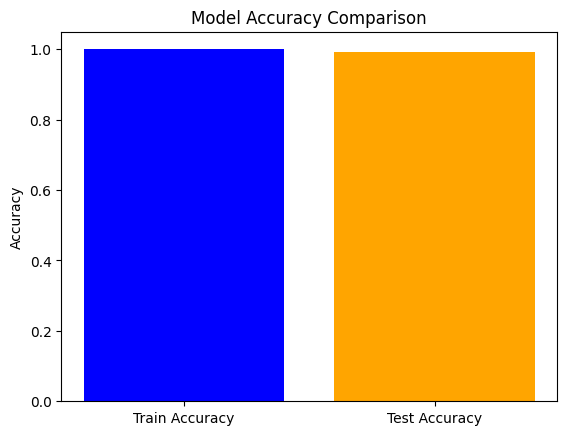

In [156]:
# BAG OF WORDS:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report
models = {
    'LogisticRegression' : LogisticRegression(),
    'Support Vector Classifier' : SVC(),
    'KNN' : KNeighborsClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'Gradient Boost' :GradientBoostingClassifier()
}

for model in models:
    curr_model =  models[model]

    curr_model.fit(x_train_bow,y_train)
    train = curr_model.predict(x_train_bow)
    test = curr_model.predict(x_test_bow)

    print(f"Model : {model} ")
    print(f"Train data accuracy: {accuracy_score(y_train,train)}")
    print(f"Test data accuracy {accuracy_score(y_test,test)}")
    print("\n")

    plt.bar(['Train Accuracy', 'Test Accuracy'], [accuracy_score(y_train,train), accuracy_score(y_test,test)], color=['blue', 'orange'])
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.show()


In [157]:
# Tf - Idf vectors:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report
models = {
    'LogisticRegression' : LogisticRegression(),
    'Support Vector Classifier' : SVC(),
    'KNN' : KNeighborsClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'Gradient Boost' :GradientBoostingClassifier()
}
model_results = []

for model in models:
    curr_model =  models[model]

    curr_model.fit(x_train_tfidf,y_train)
    train = curr_model.predict(x_train_tfidf)
    test = curr_model.predict(x_test_tfidf)
    
    print(f"Model : {model} ")
    print(f"Train data accuracy: {accuracy_score(y_train,train)}")
    print(f"Test data accuracy {accuracy_score(y_test,test)}")
    print("\n")
    model_results.append([model, accuracy_score(y_train,train),accuracy_score(y_test,test)])
    



Model : LogisticRegression 
Train data accuracy: 0.9985141158989599
Test data accuracy 0.9826989619377162


Model : Support Vector Classifier 
Train data accuracy: 1.0
Test data accuracy 0.986159169550173


Model : KNN 
Train data accuracy: 0.9777117384843982
Test data accuracy 0.9688581314878892


Model : RandomForestClassifier 
Train data accuracy: 1.0
Test data accuracy 0.986159169550173


Model : Gradient Boost 
Train data accuracy: 1.0
Test data accuracy 0.9930795847750865




In [27]:
from sklearn.linear_model import LogisticRegression
my_model2 = LogisticRegression()
my_model2.fit(x_train_tfidf,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
#best model : Logistic Regression
#best preprocessor : BAG of WORDS:
import os
dir_name = 'Artifacts'
os.makedirs(name=dir_name,exist_ok=True)
preprocessor_path = os.path.join(dir_name,'preprocessor.pkl')
model_path = os.path.join(dir_name,'model.pkl')


In [29]:
from utils import save_file

#saving model:
save_file(file_path=model_path,obj=my_model2)

#saving preprocessor:
save_file(file_path=preprocessor_path,obj=bow)

In [30]:
decoder_path = os.path.join(dir_name,'decoder.pkl')
save_file(file_path=decoder_path,obj=le)